## STUDENT PERFORMANCE INDICATOR

### Life cycle of a machine learning project:
1. Understand the probleem statement
2. Data collection
3. Data checks to perform
4. EDA
5. Data Pre-processing
6. Model Training
7. Choose best model

### 1. Problem Statement

- This project understands how the student's performance (test scores) is affected by variables such as gender, ethnicity, parental level of education, Lunch, and Test preparation course.

### 2. Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and required packages

In [4]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("stud.csv")

In [11]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### 2.2 Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [14]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no missing values in the dataset

#### 3.2 Check Duplicates

In [16]:
df.duplicated().sum()

np.int64(0)

##### There are no duplicates in the dataset

#### 3.3 Check data type

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 5 columns are categorical and 3 are numerical

#### 3.4 Check the number of unique values of each column

In [18]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### The numerical columns as expected have a greater number of unique values than categorical columns 

#### 3.5 Check statistics of dataset 

In [19]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- The means of all three columns are very similar
- The standard deviations are also very close
- The minimum for maths is 0 while for reading and writing is higher

#### 3.6 Check the different categories present in the categorical columns

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
cat_col = df.select_dtypes(include="object").columns
for col in cat_col:
    print(df[col].value_counts(normalize=True))

gender
female    0.518
male      0.482
Name: proportion, dtype: float64
race_ethnicity
group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: proportion, dtype: float64
parental_level_of_education
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: proportion, dtype: float64
lunch
standard        0.645
free/reduced    0.355
Name: proportion, dtype: float64
test_preparation_course
none         0.642
completed    0.358
Name: proportion, dtype: float64


- There are more female students than male students
- Majority of the parents have gone to some college
- Most of the students have standard lunch
- 36% of the students have completed the test preparation course

#### 3.7 Classifying numerical and categroical features

In [35]:
num_col = df.select_dtypes(exclude="object").columns
print("Categorical features:",cat_col)
print("Numerical features:",num_col)

Categorical features: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')
Numerical features: Index(['math_score', 'reading_score', 'writing_score'], dtype='object')


#### 3.8 Adding columns Total Score and Avg Score

In [82]:
df["Total Score"] = df.iloc[:,-3]+df.iloc[:,-2]+df.iloc[:,-1]
df["Avg Score"] = df["Total Score"]/3
df["Avg Score"] = round(df["Avg Score"],2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Avg Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


#### 3.9 Performance of students in each subject

In [83]:
reading_full = df[df["reading_score"]==100]["reading_score"].count()
writing_full = df[df["writing_score"]==100]["writing_score"].count()
math_full = df[df["math_score"]==100]["math_score"].count()

In [84]:
print(f"There are {reading_full} students who scored full in reading")
print(f"There are {writing_full} students who scored full in writing")
print(f"There are {math_full} students who scored full in math")

There are 17 students who scored full in reading
There are 14 students who scored full in writing
There are 7 students who scored full in math


In [85]:
reading_less20 = df[df["reading_score"]<=20]["reading_score"].count()
writing_less20 = df[df["writing_score"]<=20]["writing_score"].count()
math_less20 = df[df["math_score"]<=20]["math_score"].count()


In [86]:
print(f"There are {reading_less20} students with less than 20 marks in reading")
print(f"There are {writing_less20} students with less than 20 marks in writing")
print(f"There are {math_less20} students with less than 20 marks in math")

There are 1 students with less than 20 marks in reading
There are 3 students with less than 20 marks in writing
There are 4 students with less than 20 marks in math


- Students have performed the worst in maths
- Students have performed the best in reading

### 4. EDA

#### 4.1 Visualize average score distribution to make some conclusions

##### 4.1.1 Histogram and KDE

<Axes: xlabel='Avg Score', ylabel='Count'>

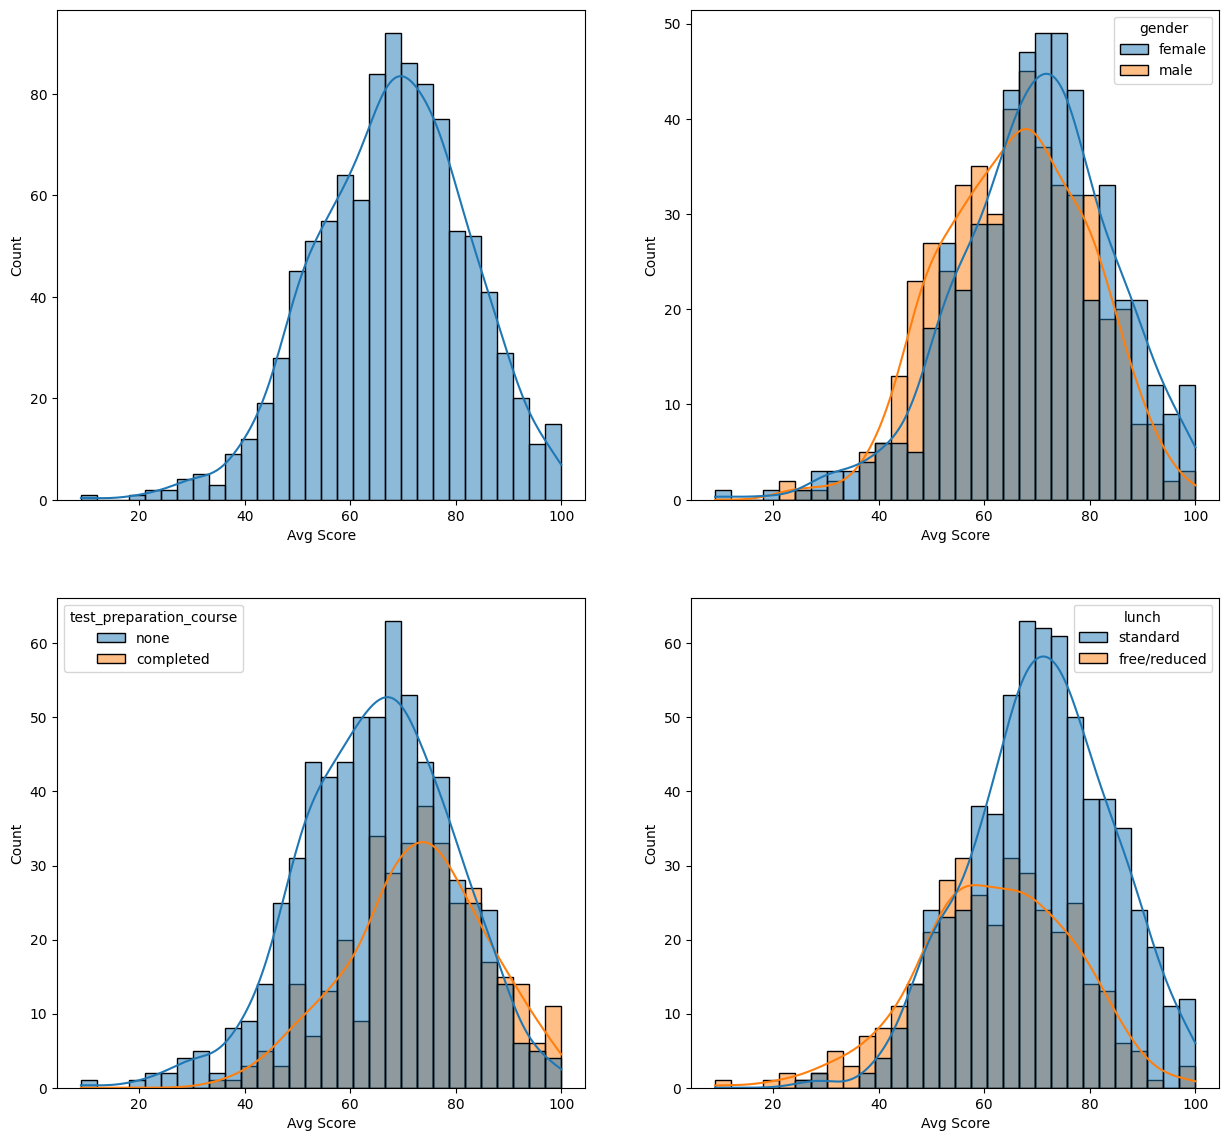

In [87]:
fig, axs = plt.subplots(2,2, figsize=(15,14))
plt.subplot(2,2,1)
sns.histplot(data=df, x="Avg Score", kde=True, bins=30)
plt.subplot(2,2,2)
sns.histplot(data=df, x="Avg Score", kde=True, bins=30, hue="gender")
plt.subplot(2,2,3)
sns.histplot(data=df, x="Avg Score", kde=True, bins=30, hue="test_preparation_course")
plt.subplot(2,2,4)
sns.histplot(data=df, x="Avg Score", kde=True, bins=30, hue="lunch")

- Majority of the students have a avg score of between 60 to 80
- Female students have performed better than male students
- Students who completed the test preparation course performed better than the students who didn't
- Students who had standard lunch before test performed better than students who had free lunch

<Axes: xlabel='Avg Score', ylabel='Count'>

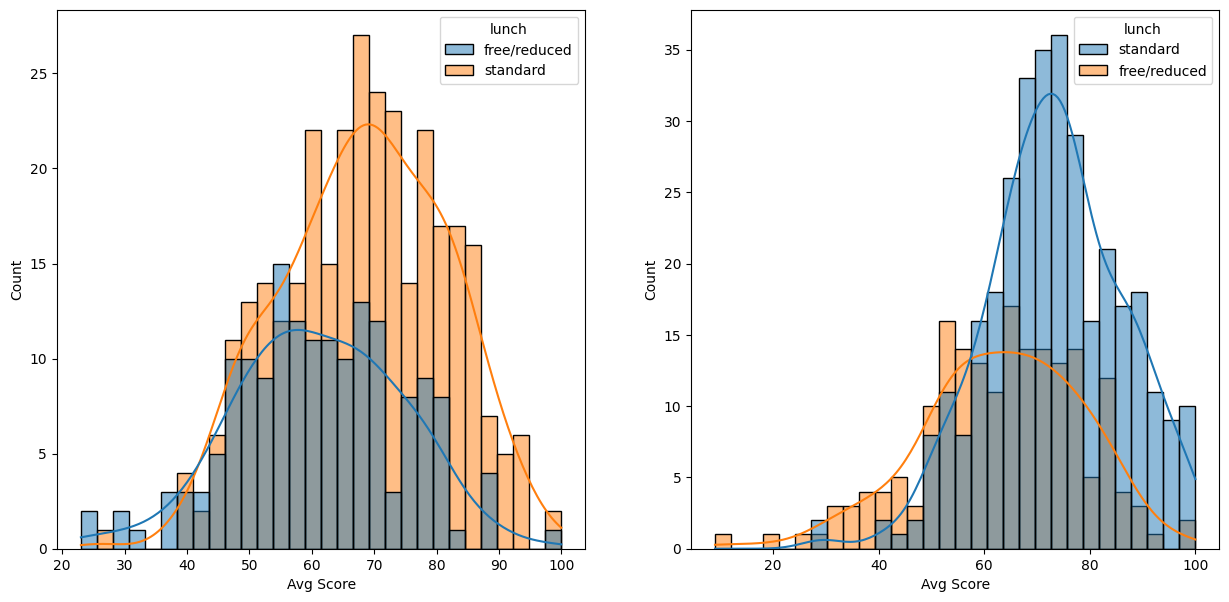

In [88]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df[df.gender=="male"], x="Avg Score", kde=True, bins=30, hue="lunch")
plt.subplot(1,2,2)
sns.histplot(data=df[df.gender=="female"], x="Avg Score", kde=True, bins=30, hue="lunch")

- Be it male or female, in both cases standard lunch helps perform well in exams

<Axes: xlabel='Avg Score', ylabel='Count'>

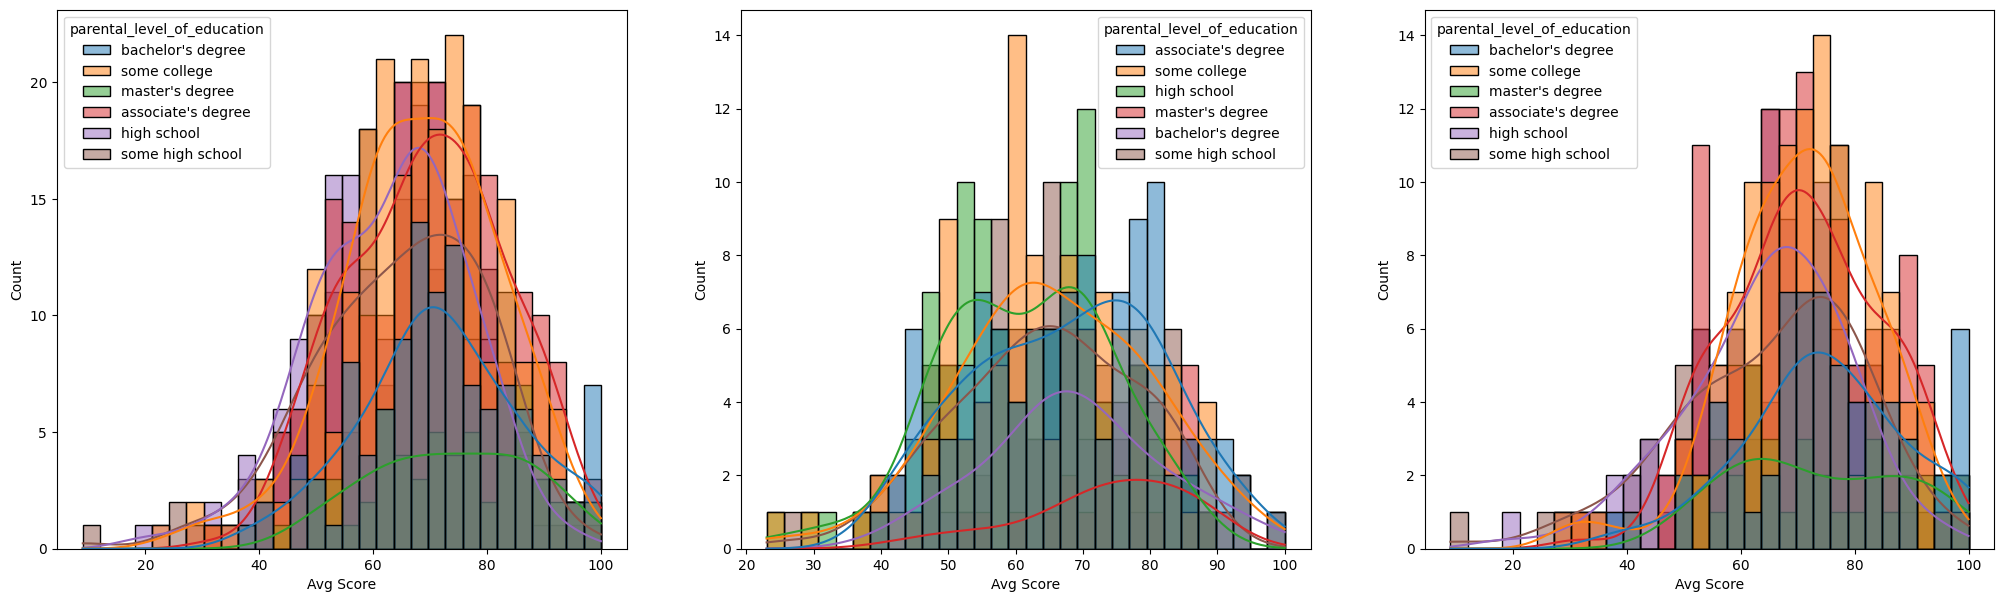

In [93]:
fig, axs = plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,3,1)
sns.histplot(data=df, x="Avg Score", kde=True, bins=30, hue="parental_level_of_education")
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=="male"], x="Avg Score", kde=True, bins=30, hue="parental_level_of_education")
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=="female"], x="Avg Score", kde=True, bins=30, hue="parental_level_of_education")

- In general there is no such impact of parents level of eduction on theirs child's performance
- In 2nd plot for male students, children of parents with associate or masters degree tend to perform slightly better 

<Axes: xlabel='Avg Score', ylabel='Count'>

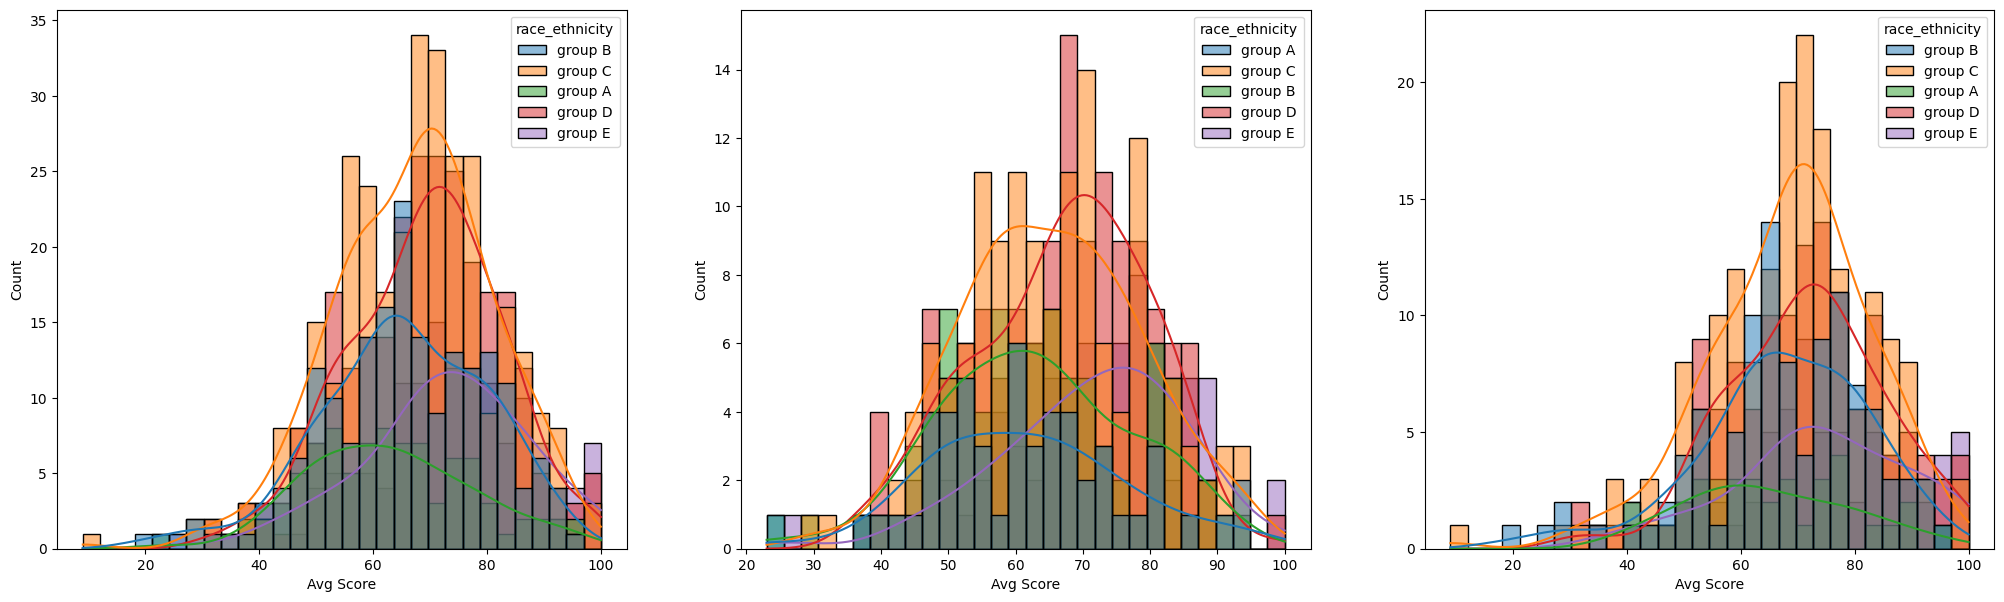

In [94]:
fig, axs = plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,3,1)
sns.histplot(data=df, x="Avg Score", kde=True, bins=30, hue="race_ethnicity")
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=="male"], x="Avg Score", kde=True, bins=30, hue="race_ethnicity")
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=="female"], x="Avg Score", kde=True, bins=30, hue="race_ethnicity")

- Students of group A and B tend to perform poorly in exam, while students of group C,D,E tend to perform well whether they are male or female

#### 4.2 Visualize the distribution of scores of students in all three subjects

In [95]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Avg Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


<Axes: xlabel='writing_score', ylabel='Count'>

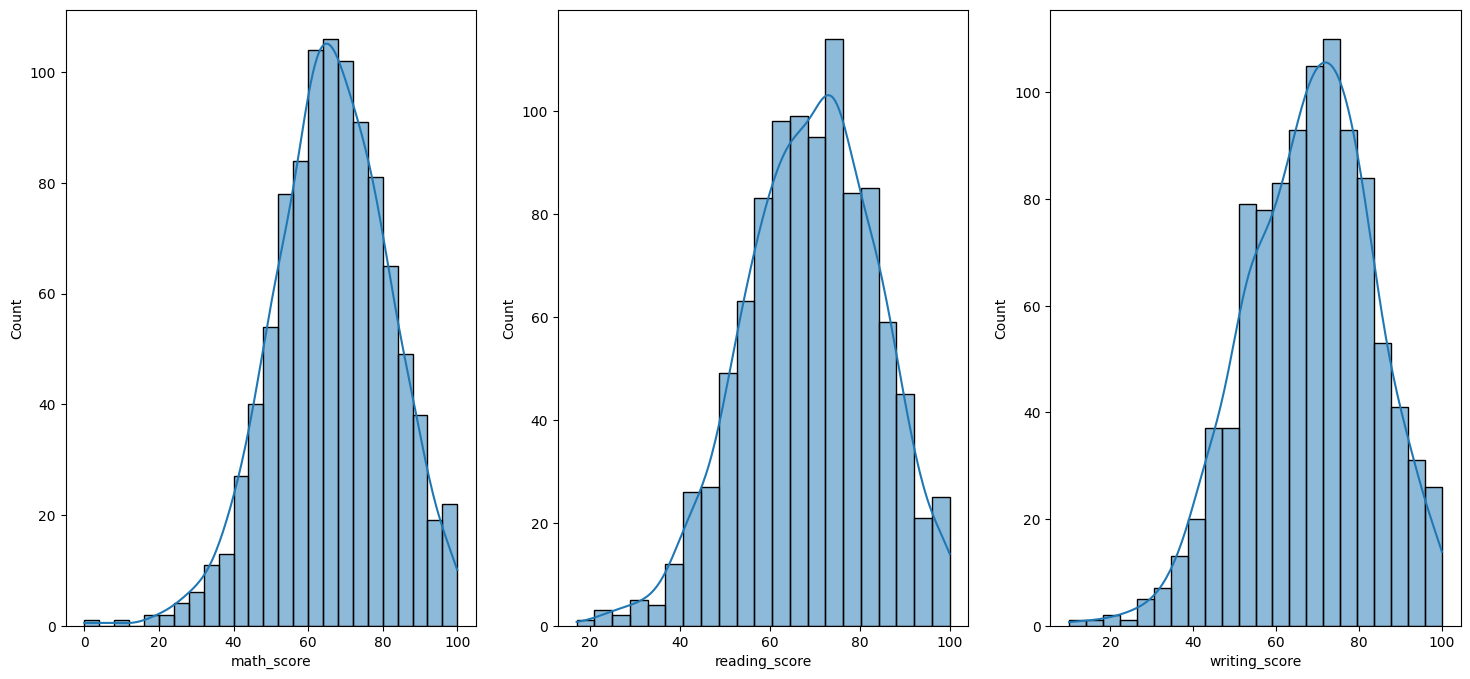

In [100]:
fig, axs = plt.subplots(1,3,figsize=(18,8))
plt.subplot(1,3,1)
sns.histplot(data=df, x="math_score", kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df, x="reading_score", kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df, x="writing_score", kde=True)

<Axes: ylabel='writing_score'>

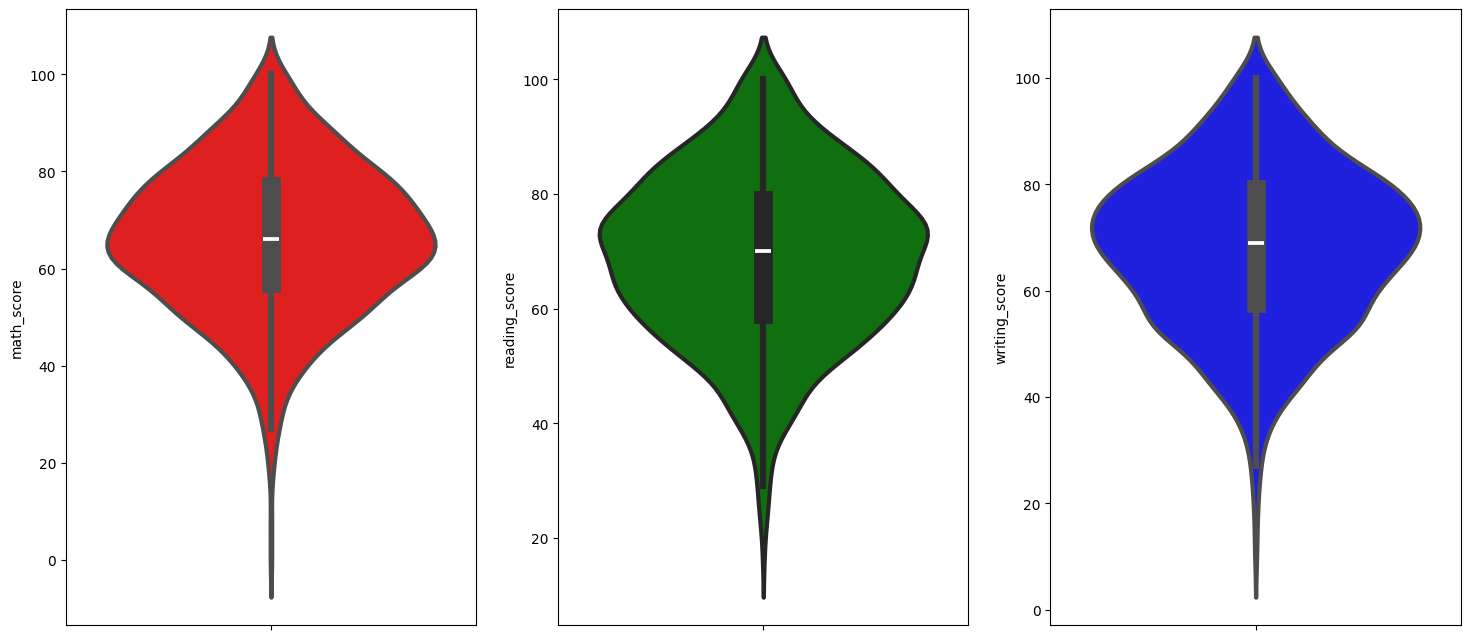

In [107]:
fig, axs = plt.subplots(1,3,figsize=(18,8))
plt.subplot(1,3,1)
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,3,2)
sns.violinplot(data=df, y="reading_score", color="green", linewidth=3)
plt.subplot(1,3,3)
sns.violinplot(data=df, y="writing_score", color="blue", linewidth=3)


- In math most of the students have score between 60-80
- While in reading and writing most of the students have between 50-80

### 4.3 MULTIVARIATE ANALYSIS

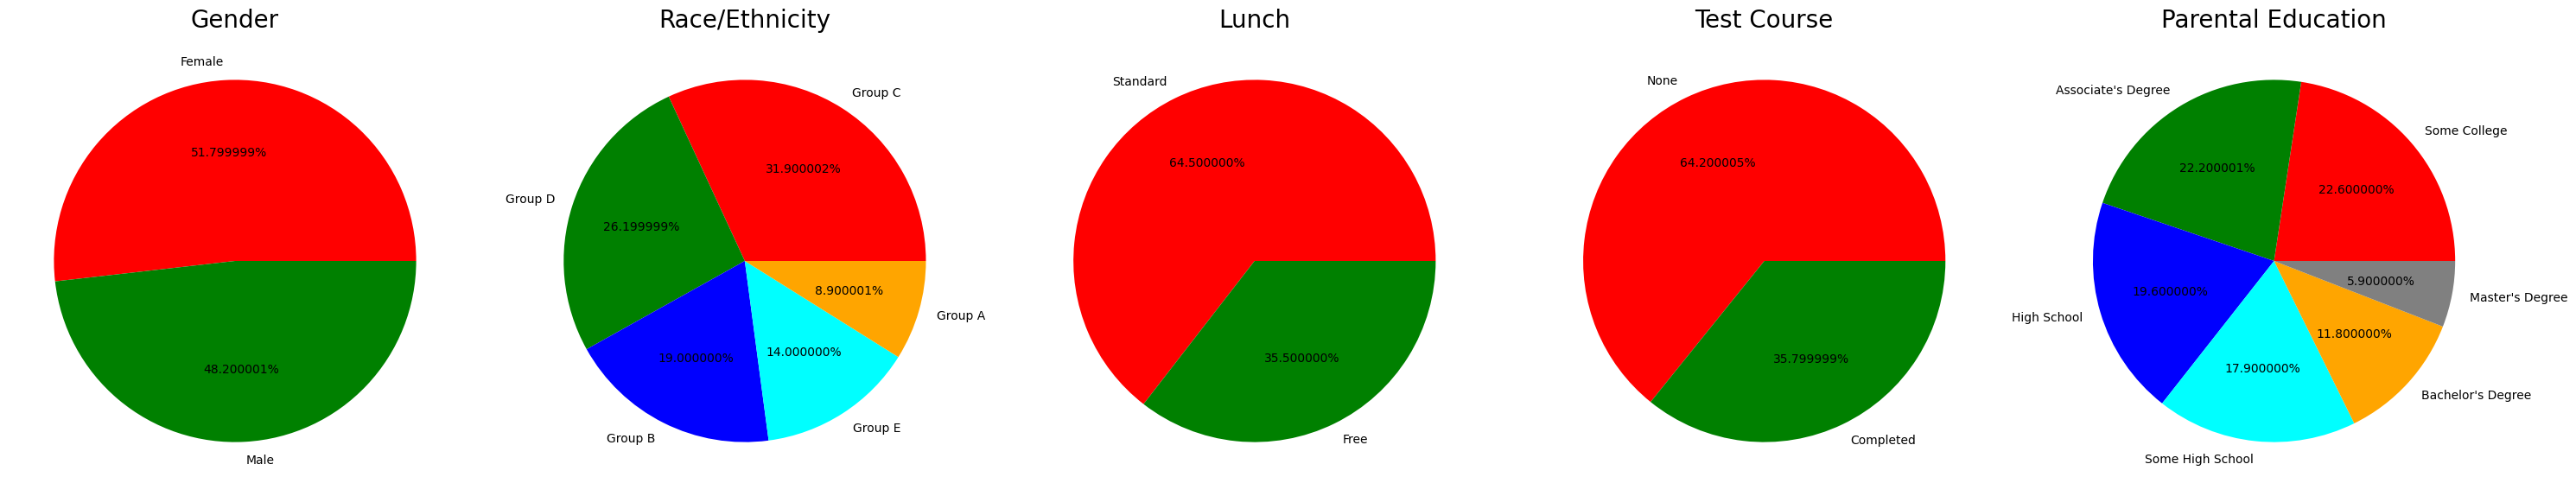

In [127]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### 4.4 Feature-wise Visualisation

#### 4.4.1 UNIVARIATE GENDER ANALYSIS (Distribution of gender)

C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\1271692683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


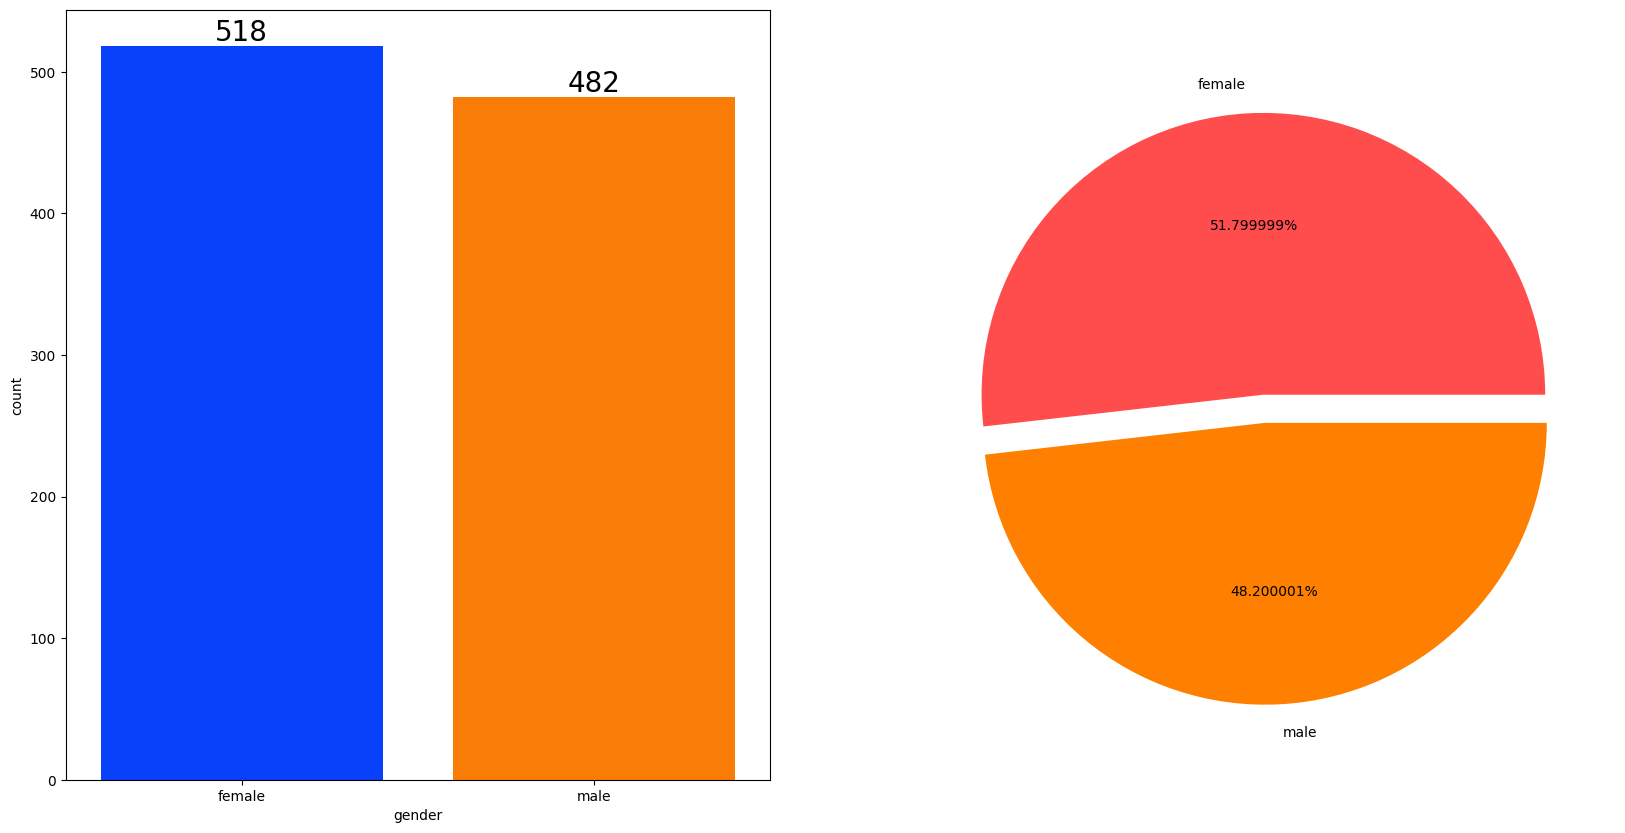

In [135]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.subplot(1,2,2)
plt.pie(x=df["gender"].value_counts(), labels=("female","male"), autopct="%2f%%", colors=['#ff4d4d','#ff8000'], explode=[0,0.1])
plt.show()

#### 4.4.2 BIVARIATE ANALYSIS (Impact of gender on students performance)

<Axes: ylabel='Avg Score'>

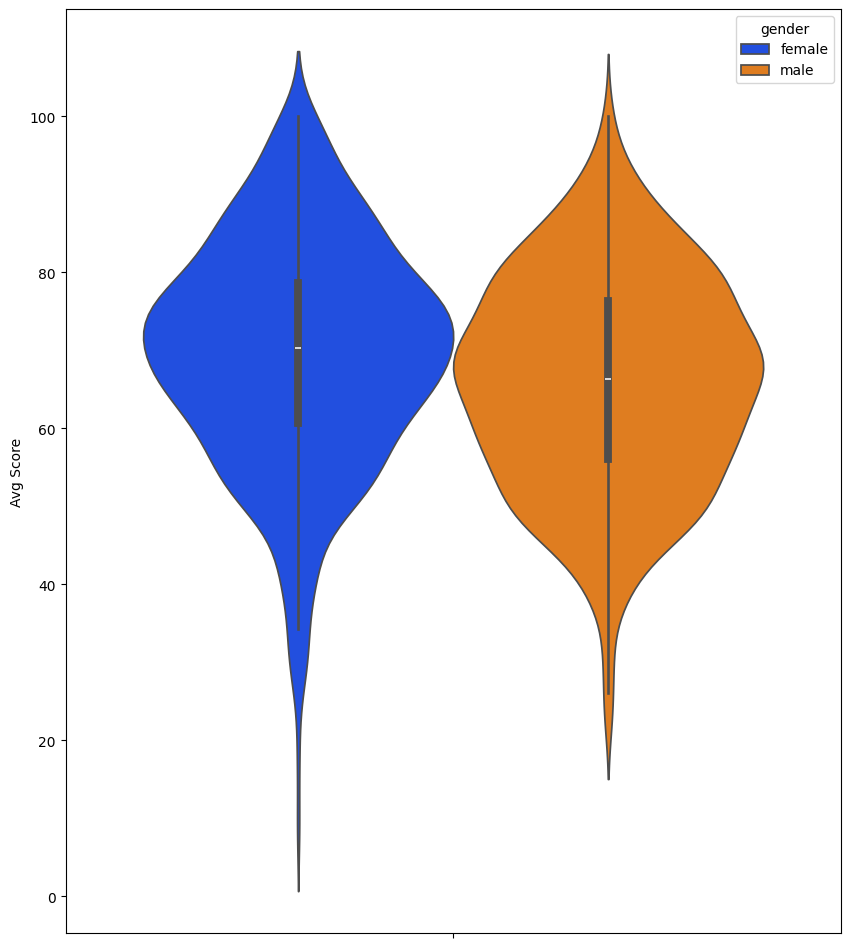

In [139]:
plt.subplots(figsize=(10,12))
sns.violinplot(data=df, y="Avg Score", color="violet", palette="bright", hue="gender")

- The median average score of females is greater than the median average score of males

In [145]:
gender_group = df.groupby(["gender"]).mean(numeric_only=True)

C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\3326723906.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['Avg Score'][0], gender_group['math_score'][0]]
C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\3326723906.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['Avg Score'][1], gender_group['math_score'][1]]


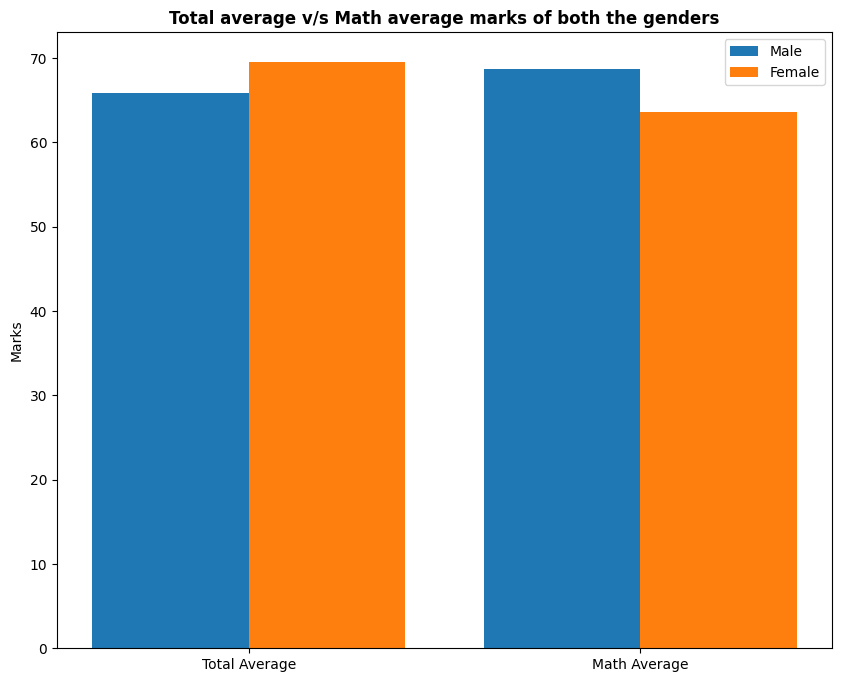

In [167]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Avg Score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Avg Score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')


  
plt.xticks(X_axis,labels=X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [156]:
X_axis

array([0, 1])

- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.3 RACE/ETHNICITY (Impact of Race/Ethnicity on students performance)

C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\3645672272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="race_ethnicity", palette="bright", saturation=0.8, ax=ax[0])


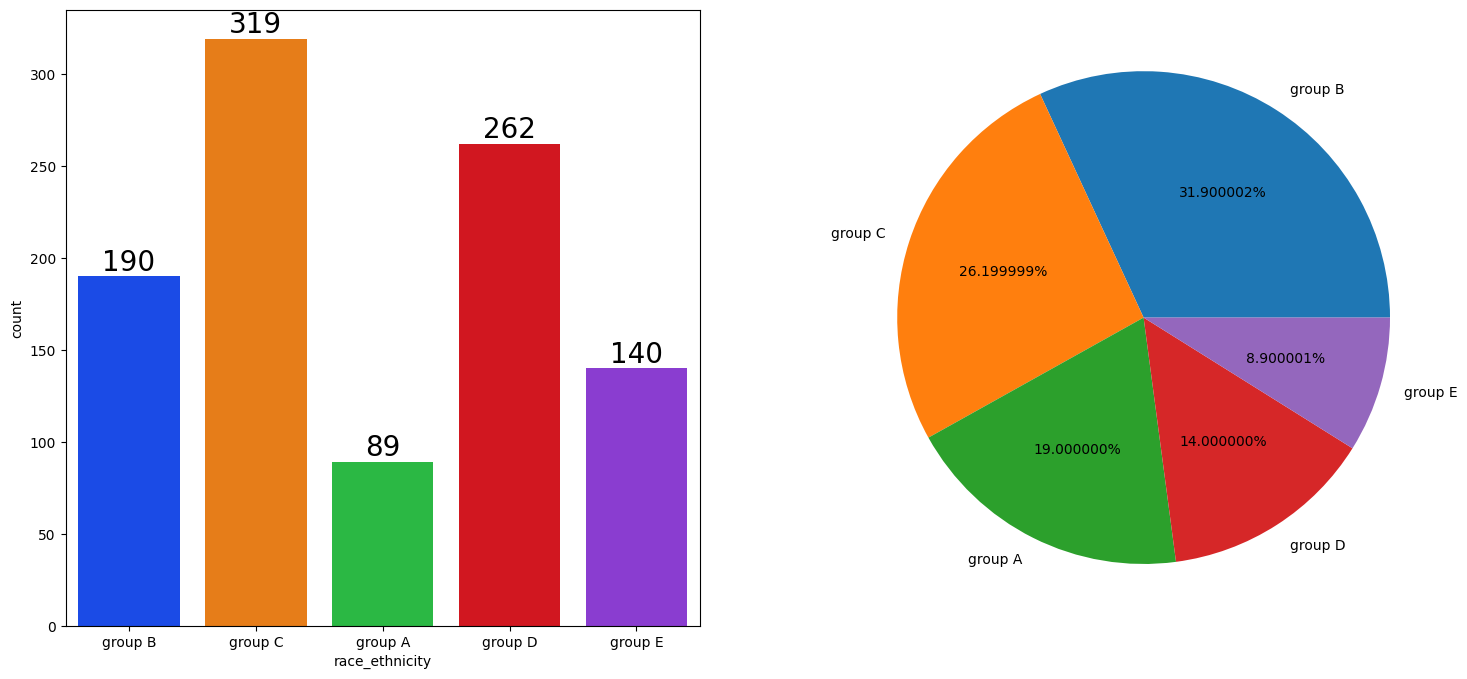

In [170]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.countplot(data=df, x="race_ethnicity", palette="bright", saturation=0.8, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)
plt.subplot(1,2,2)
plt.pie(x=df["race_ethnicity"].value_counts(), labels=df["race_ethnicity"].unique(), autopct="%2f%%")
plt.show()

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

In [172]:
race_groups = df.groupby(["race_ethnicity"]).mean(numeric_only=True)
race_groups

,math_score,reading_score,writing_score,Total Score,Avg Score
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992135
group B,63.452632,67.352632,65.600000,196.405263,65.468579
group C,64.463950,69.103448,67.827586,201.394984,67.131567
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752000


In [173]:
X = ["math_score", "reading_score", "writing_score", "Avg Score"]
X_axis = np.arange(len(X))
X_axis

array([0, 1, 2, 3])

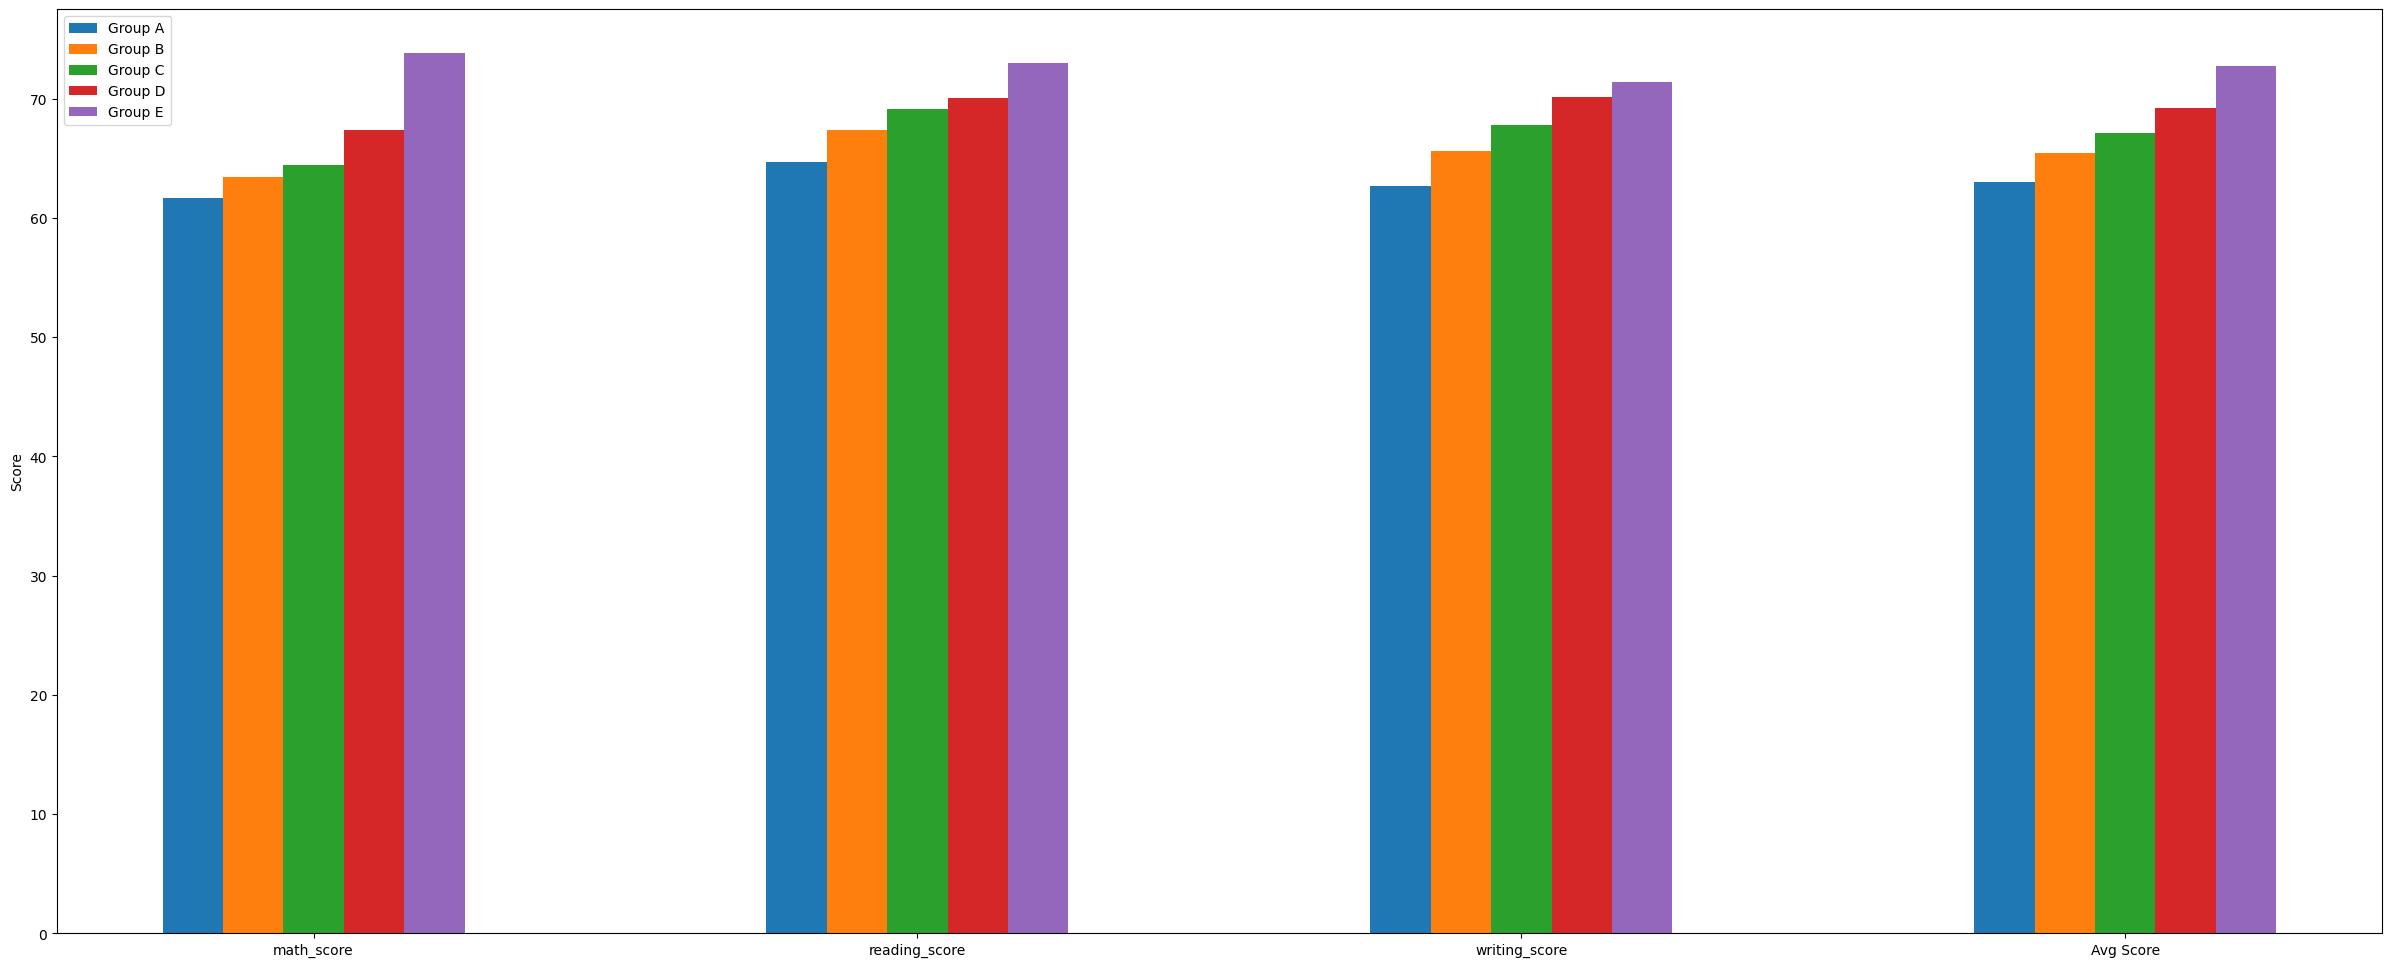

In [ ]:
plt.bar(x=X_axis-0.2, height=race_groups.iloc[0, [0,1,2,4]], width=0.1, label="Group A")
plt.bar(x=X_axis-0.1, height=race_groups.iloc[1, [0,1,2,4]], width=0.1, label="Group B")
plt.bar(x=X_axis, height=race_groups.iloc[2, [0,1,2,4]], width=0.1, label="Group C")
plt.bar(x=X_axis+0.1, height=race_groups.iloc[3, [0,1,2,4]], width=0.1, label="Group D")
plt.bar(x=X_axis+0.2, height=race_groups.iloc[4, [0,1,2,4]], width=0.1, label="Group E")
plt.ylabel("Score")
plt.xticks(X_axis, X)
plt.legend()
plt.show()

In [196]:
race_groups["reading_score"].values

array([64.6741573 , 67.35263158, 69.10344828, 70.03053435, 73.02857143])

C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\827462696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\827462696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\827462696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

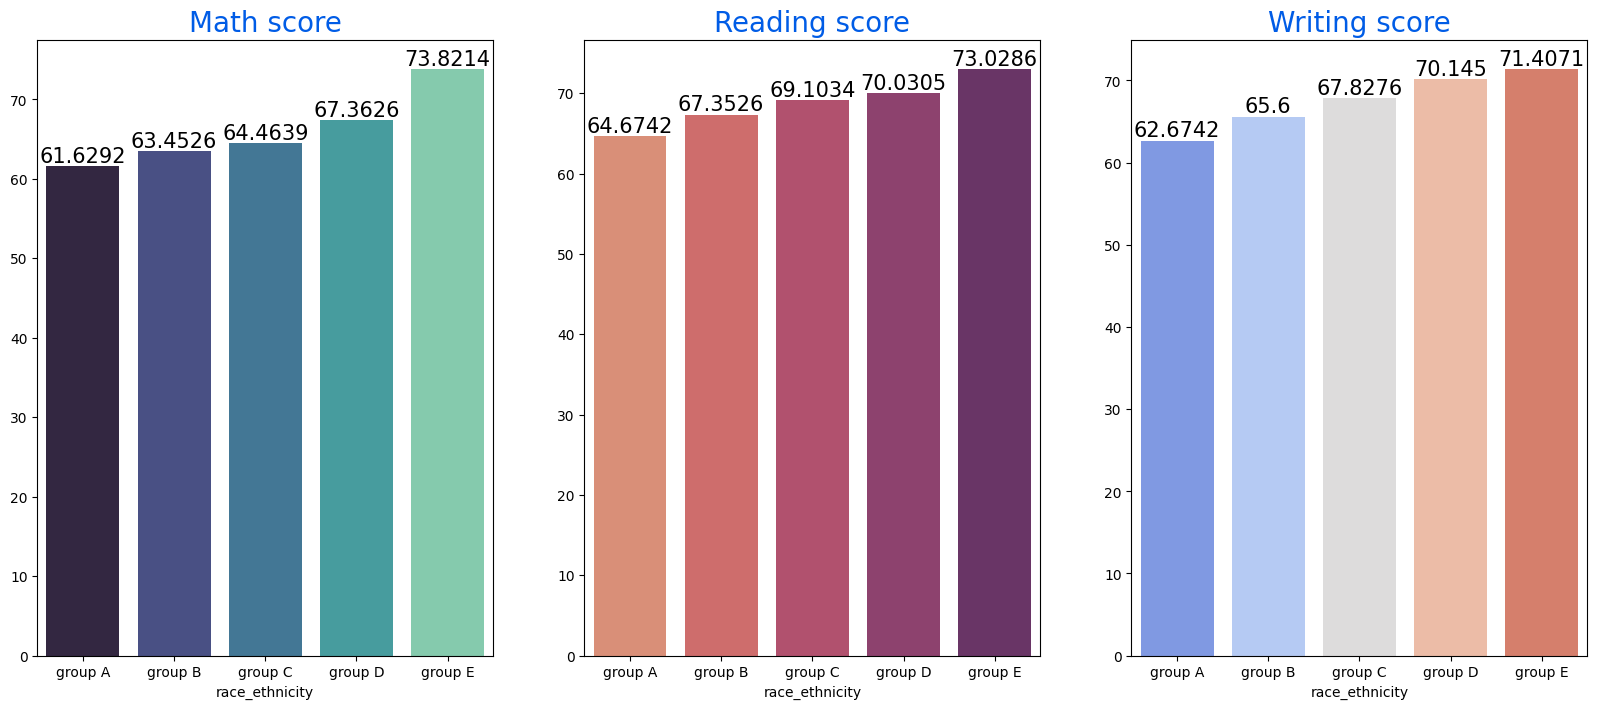

In [198]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.4 Parents level of education (Impact of parents level of education on student performance)

In [201]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Avg Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\3494632262.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["parental_level_of_education"], palette="Blues")


<Axes: xlabel='count', ylabel='parental_level_of_education'>

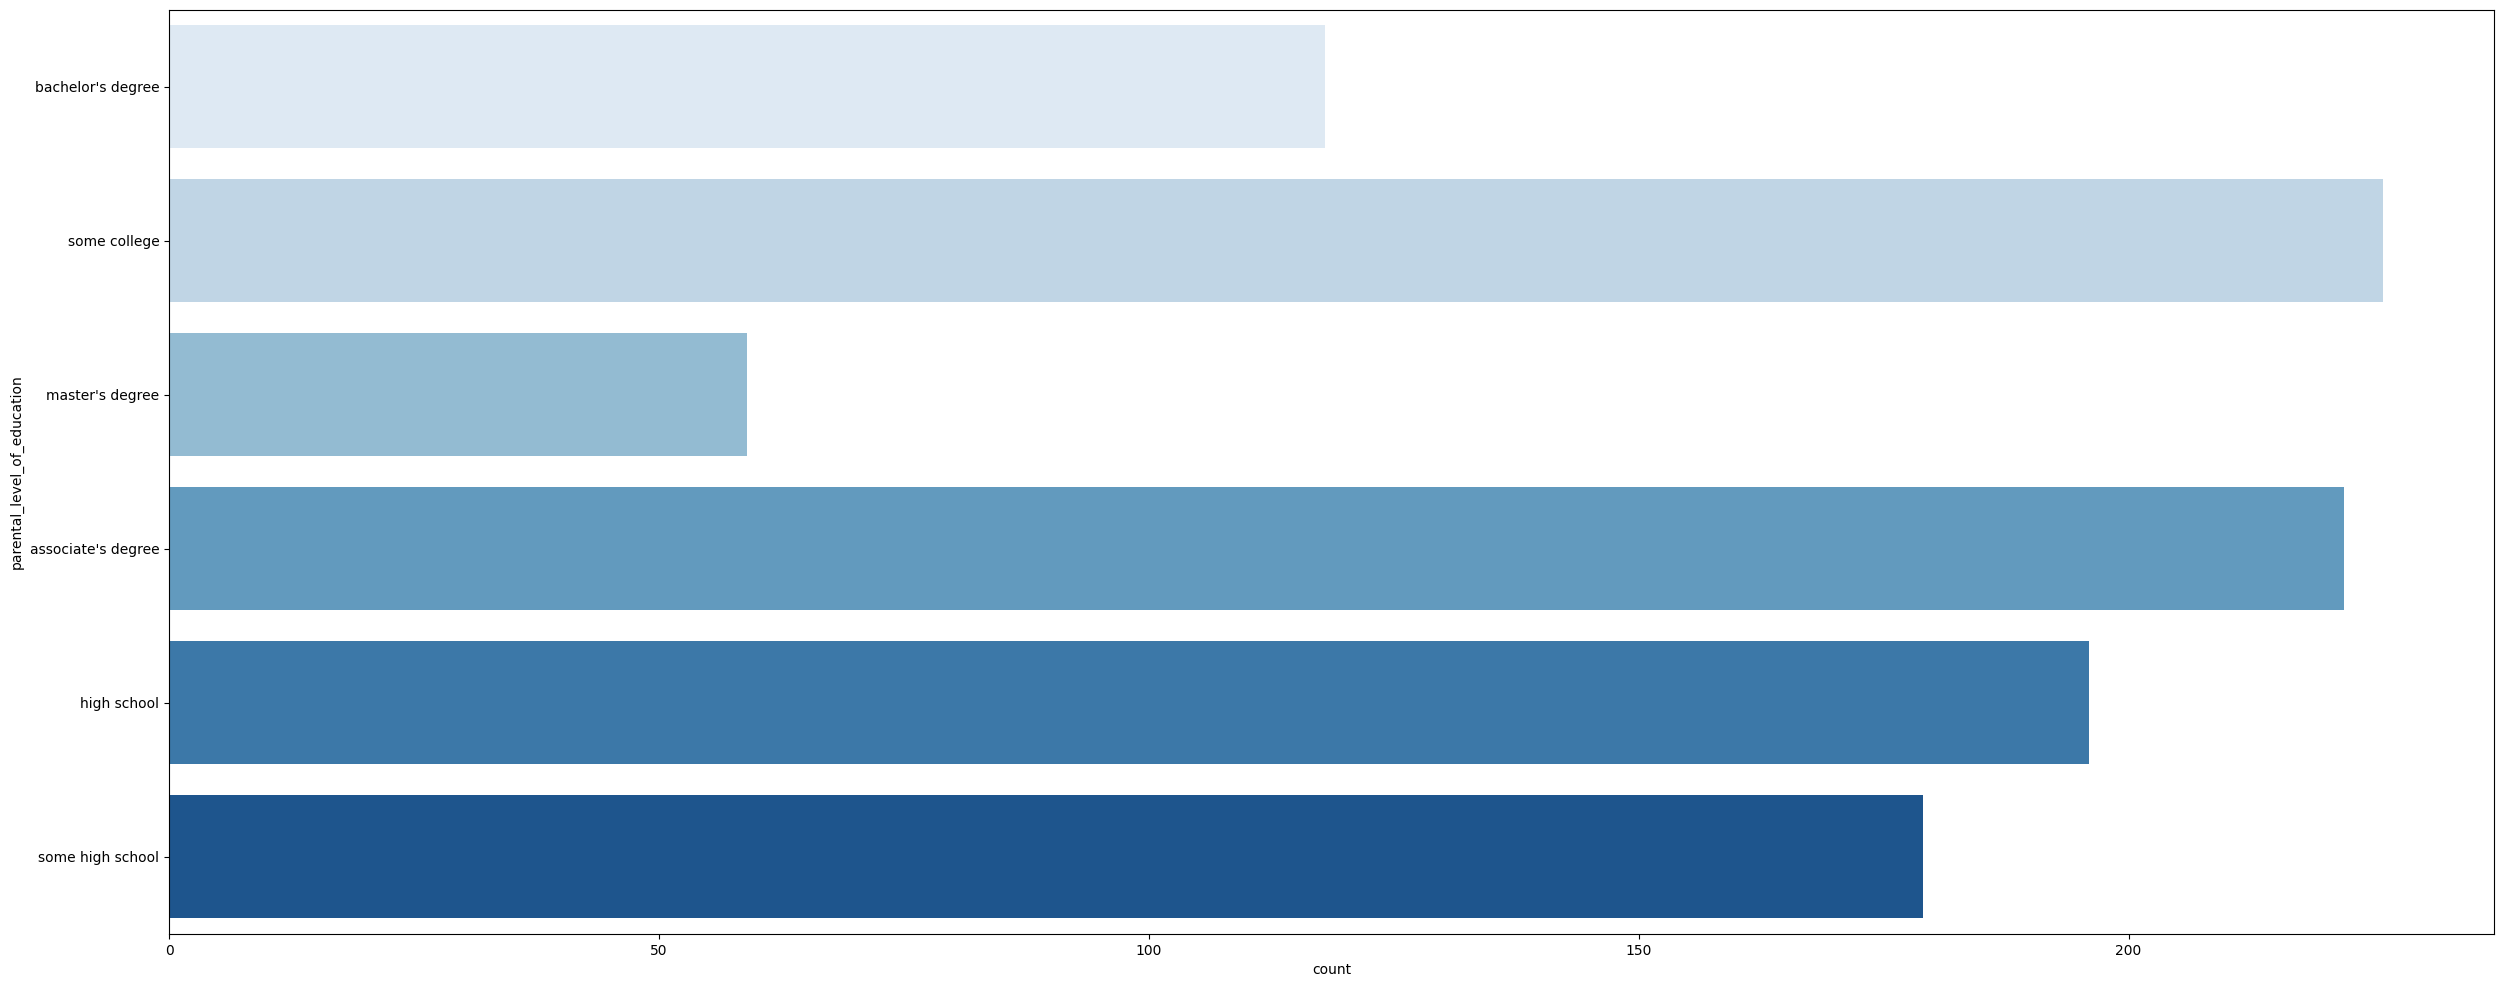

In [ ]:
sns.countplot(df["parental_level_of_education"], palette="Blues")

C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\2812551247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental_level_of_education'], palette = 'Blues')


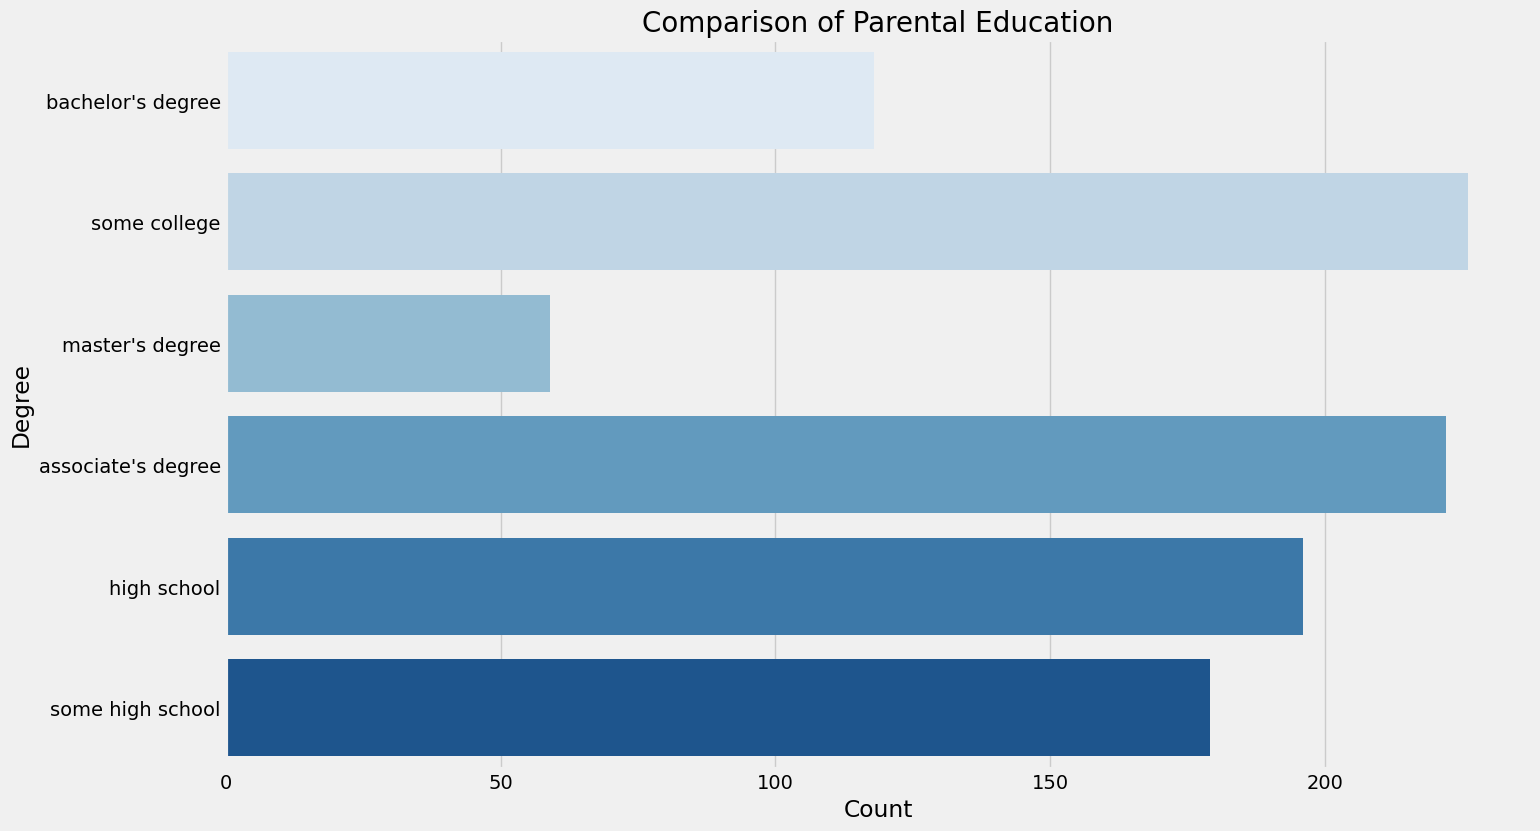

In [205]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

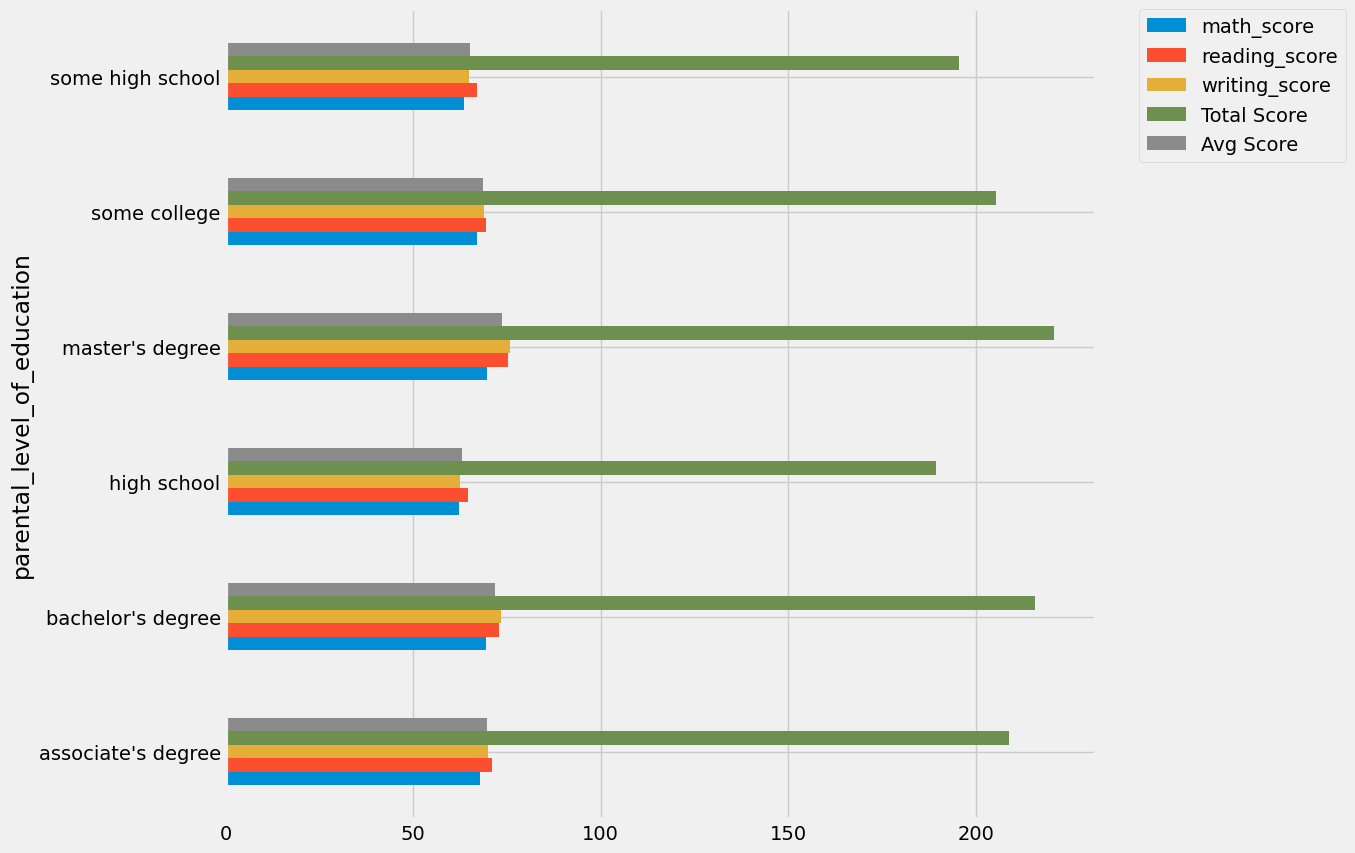

In [208]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.5 Lunch (Impact of having lunch on student performance)

C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\2045242001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="lunch", palette="Blues", ax=ax[0])


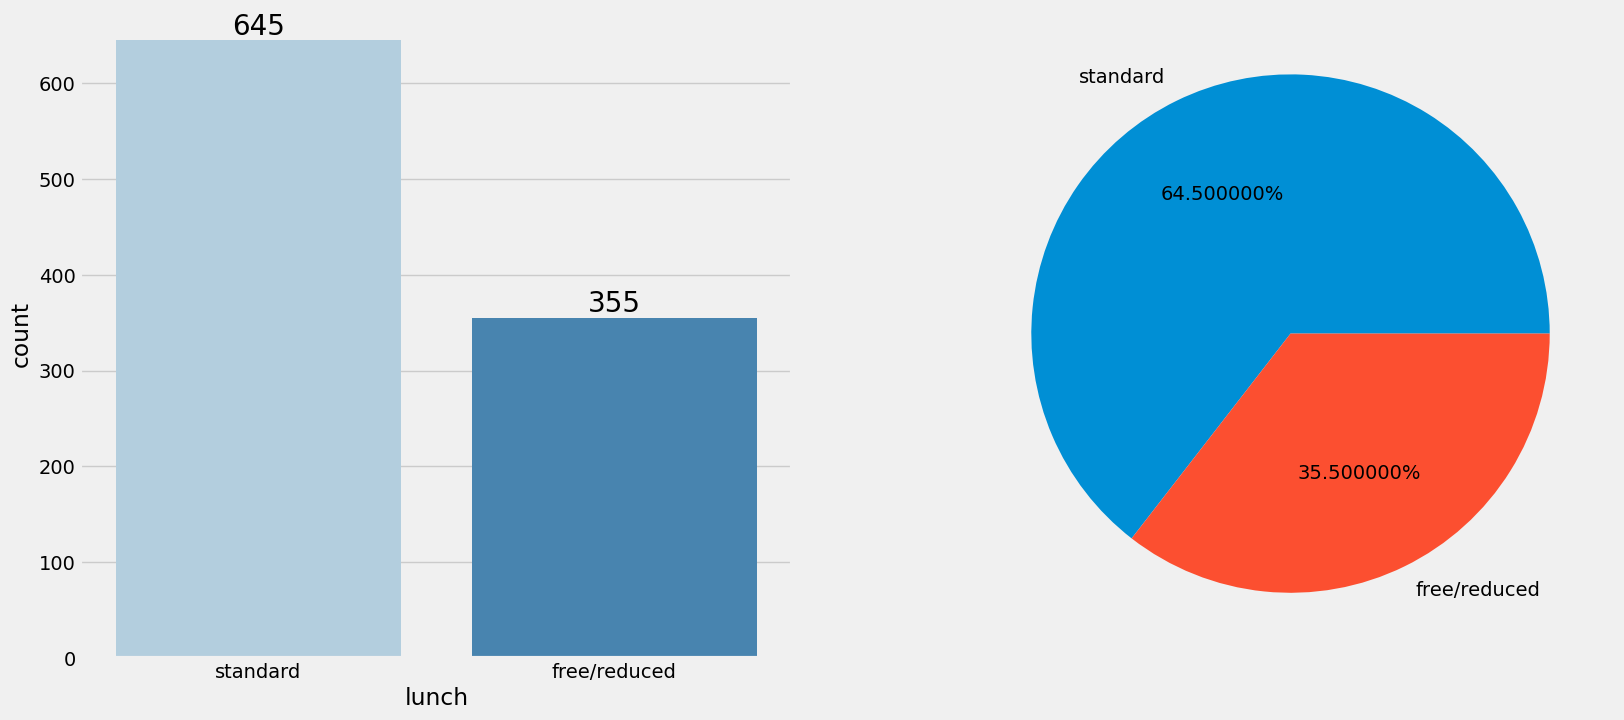

In [209]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.countplot(data=df, x="lunch", palette="Blues", ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)
plt.subplot(1,2,2)
plt.pie(x=df["lunch"].value_counts(), labels=df["lunch"].unique(), autopct="%2f%%")
plt.show()

In [210]:
lunch_group = df.groupby(["lunch"]).mean(numeric_only=True)
lunch_group

,math_score,reading_score,writing_score,Total Score,Avg Score
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.198986
standard,70.034109,71.654264,70.823256,212.511628,70.837116


Text(0.5, 0, 'Avg Score')

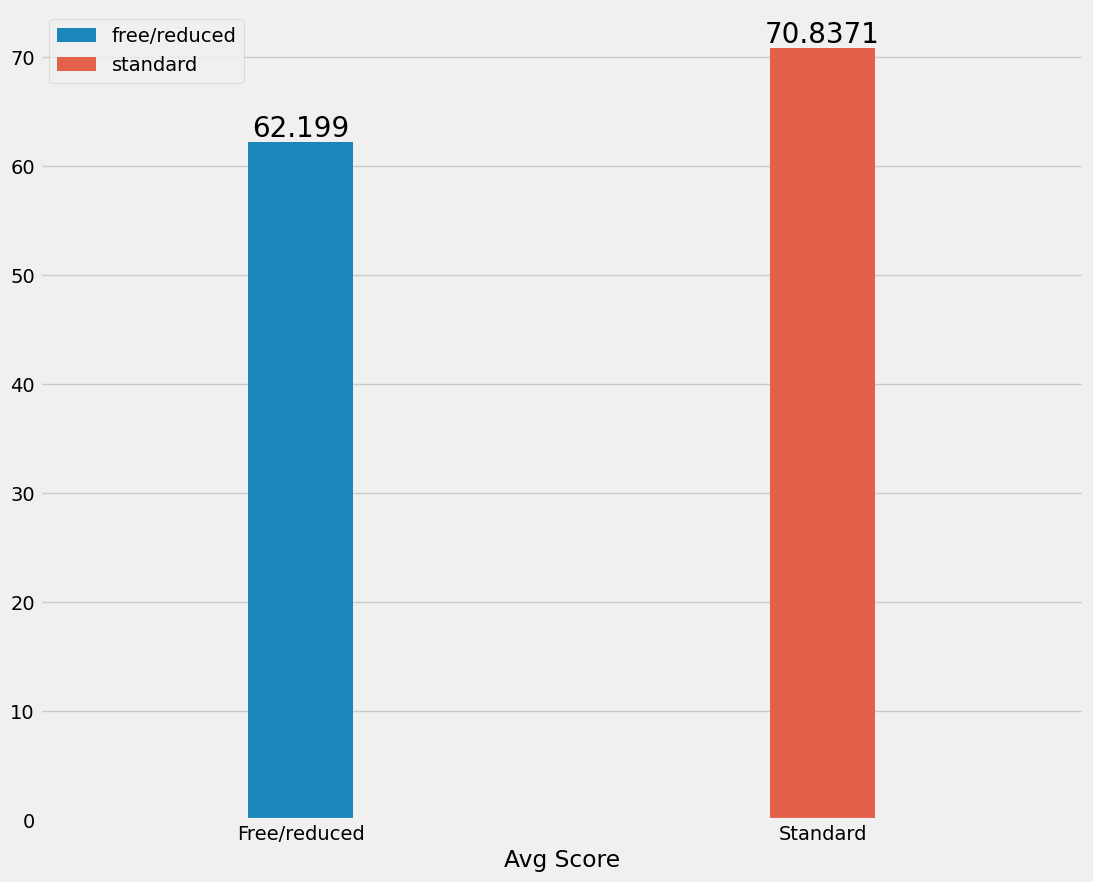

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
X = ["Avg Score"]
sns.barplot(x=[0], y=lunch_group.iloc[0,4], width=0.2, label="free/reduced",ax=ax)
sns.barplot(x=[1], y=lunch_group.iloc[1,4], width=0.2, label="standard", ax=ax)
plt.xticks([0,1],["Free/reduced", "Standard"])
for container in ax.containers:
    ax.bar_label(container, color="black", size=20)
plt.xlabel("Avg Score")


C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\3319561395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


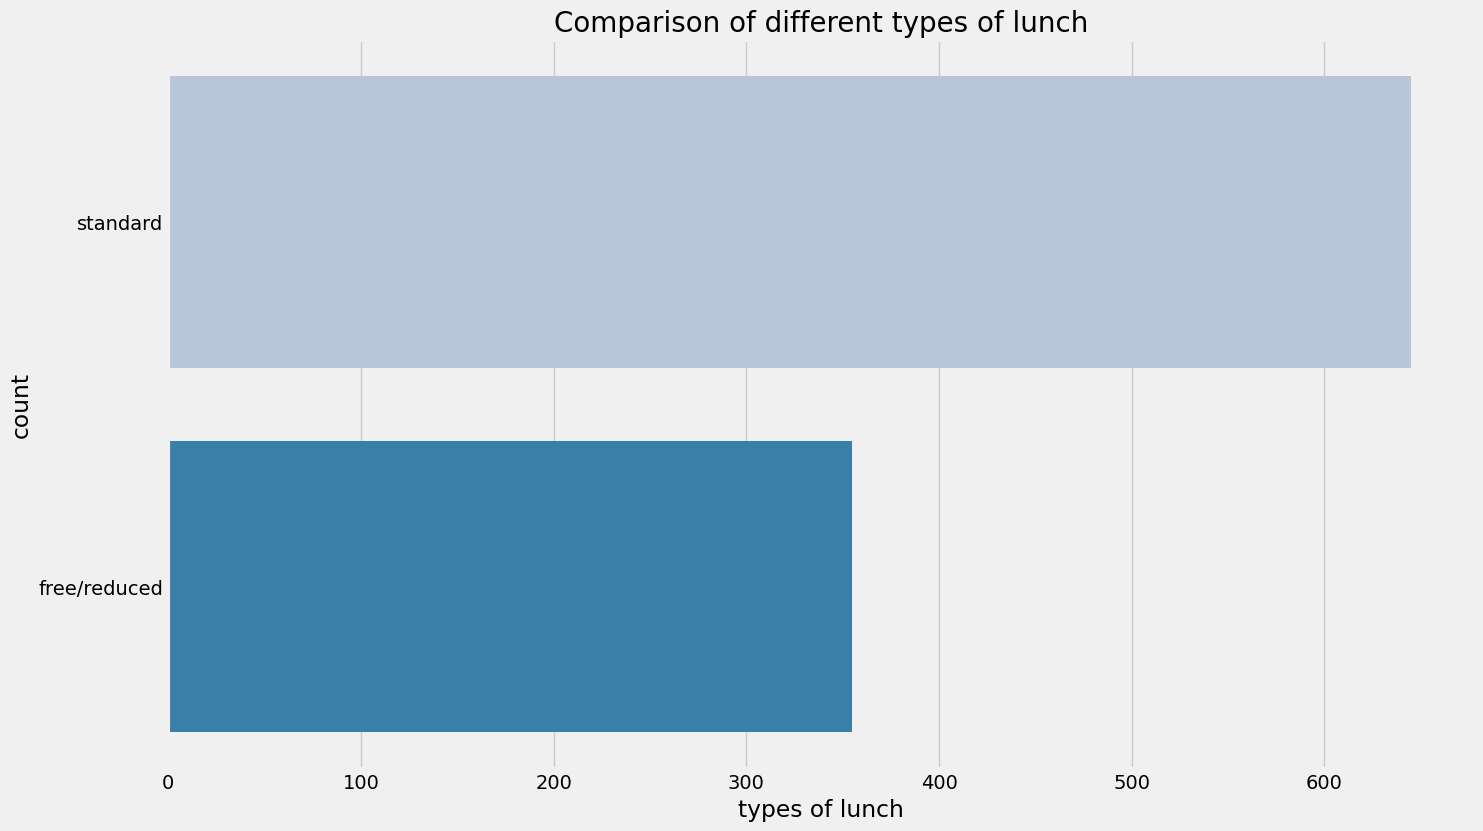

In [218]:
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

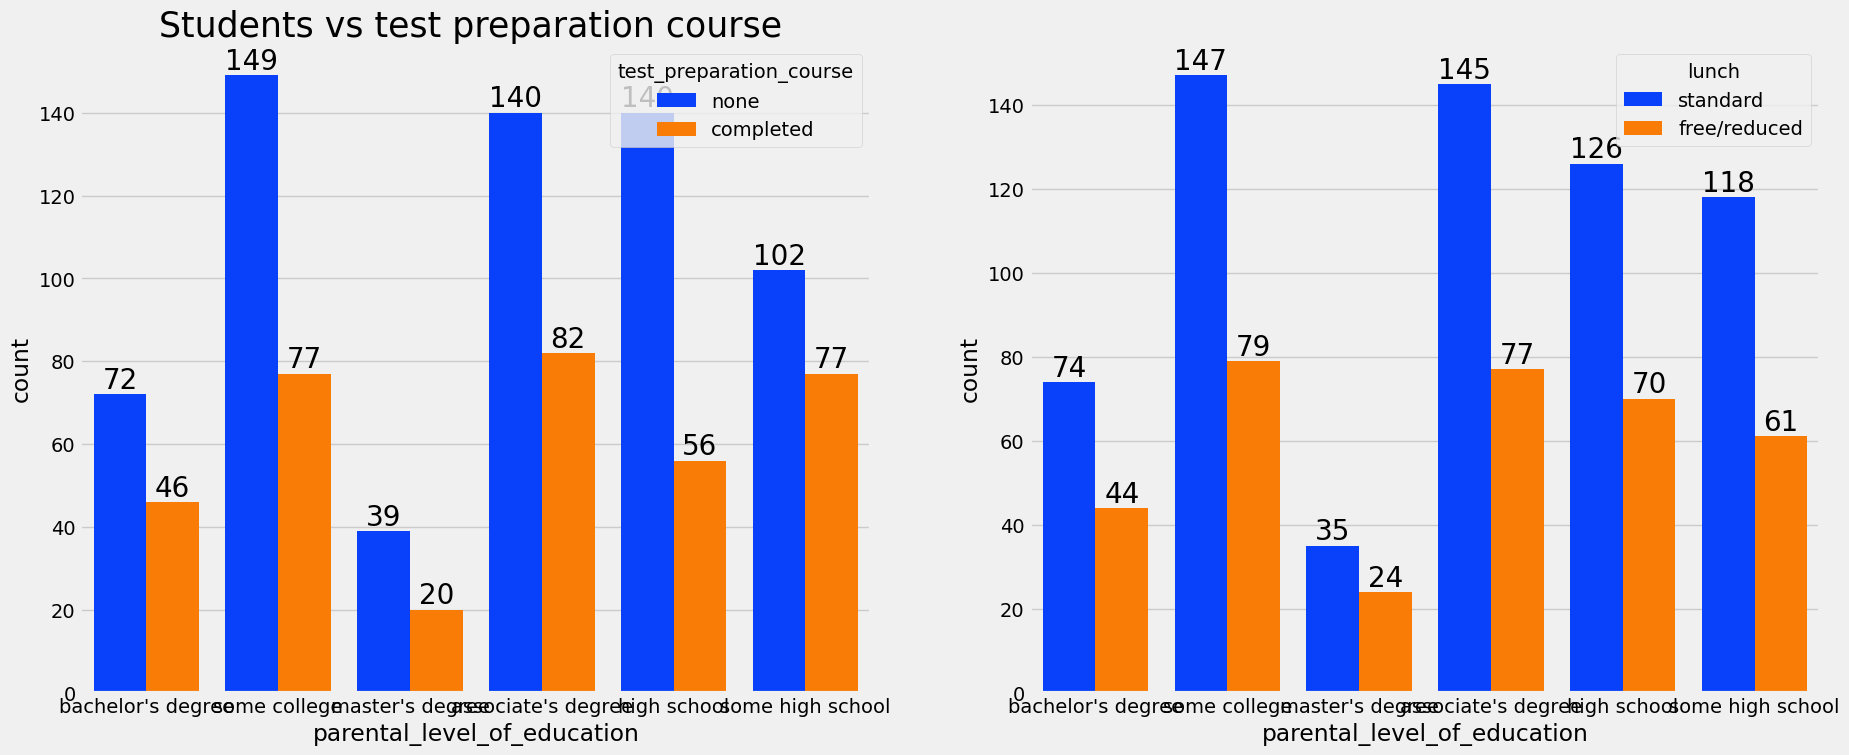

In [219]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

#### 4.4.6 Test Preparatory Course

C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\3898433936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="test_preparation_course", palette="Blues", ax=ax[0])


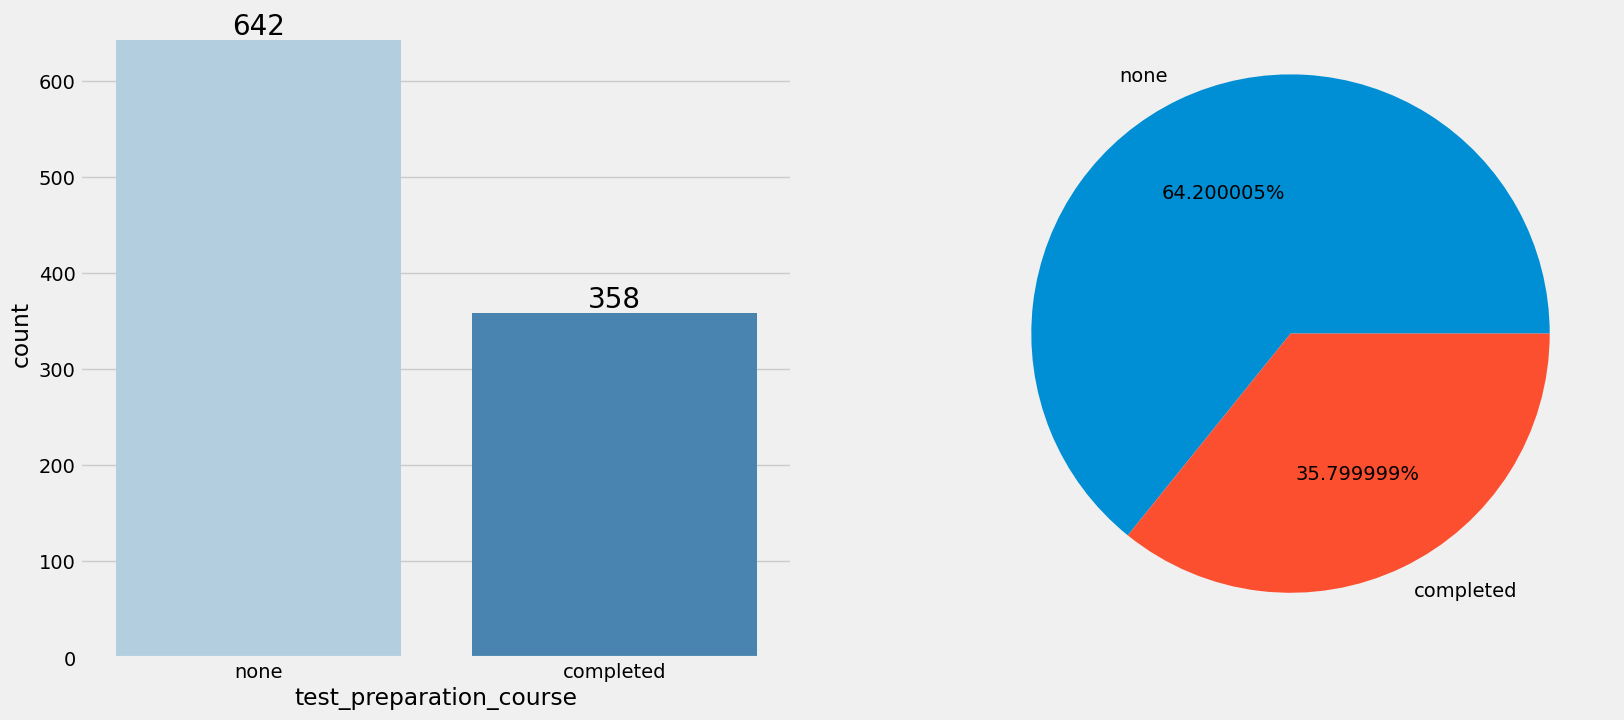

In [220]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.countplot(data=df, x="test_preparation_course", palette="Blues", ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)
plt.pie(x=df["test_preparation_course"].value_counts(), labels=df["test_preparation_course"].unique(), autopct="%2f%%")
plt.show()

In [221]:
test_group = df.groupby(["test_preparation_course"]).mean(numeric_only=True)
test_group

,math_score,reading_score,writing_score,Total Score,Avg Score
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669469
none,64.077882,66.534268,64.504673,195.116822,65.038801


C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\3301059311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_group, x="test_preparation_course", y="math_score", palette="Blues", ax=ax[0])
C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\3301059311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_group, x="test_preparation_course", y="reading_score", palette="Blues", ax=ax[1])
C:\Users\Arnav's Lappy\AppData\Local\Temp\ipykernel_472\3301059311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test

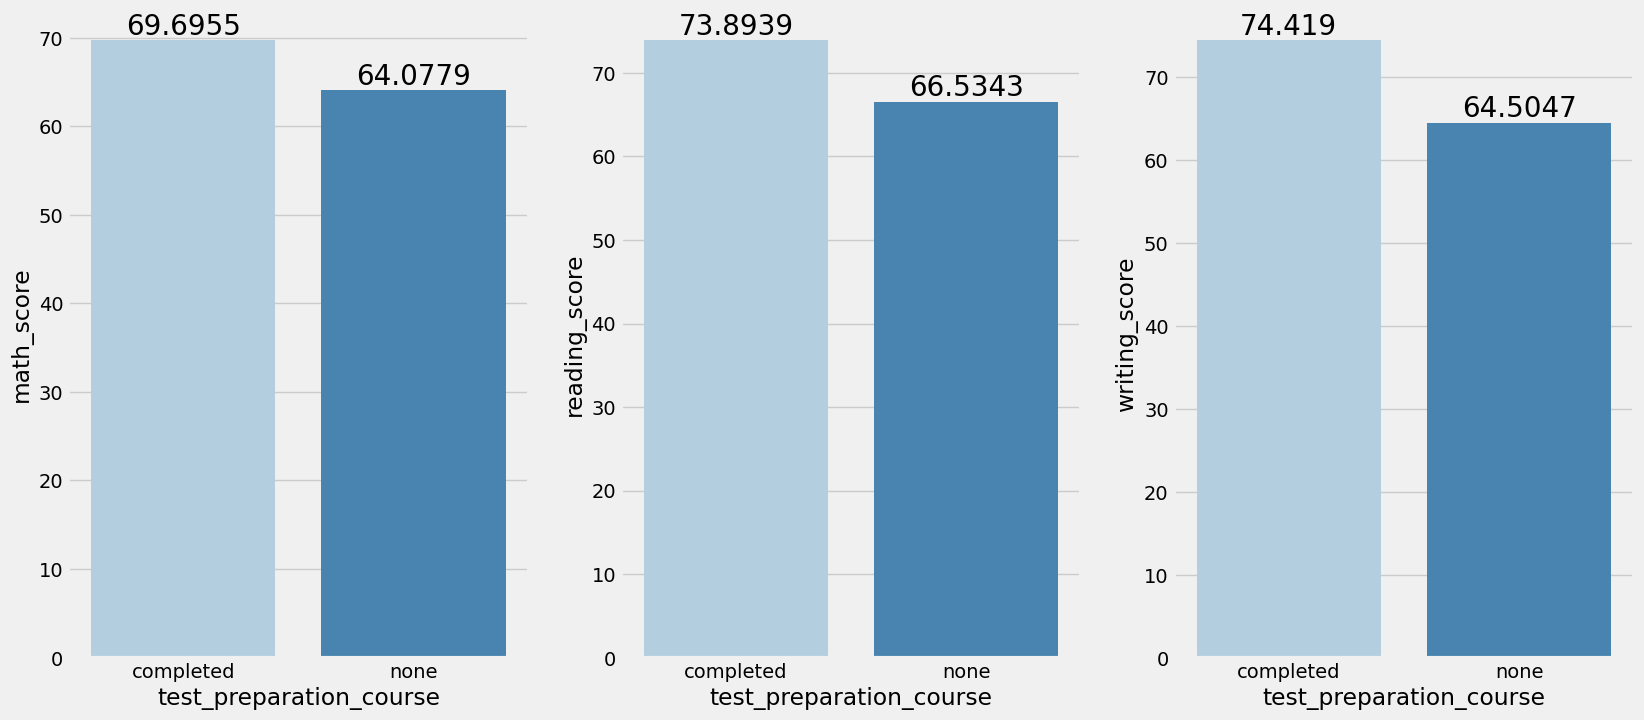

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(18,8))
sns.barplot(data=test_group, x="test_preparation_course", y="math_score", palette="Blues", ax=ax[0])
sns.barplot(data=test_group, x="test_preparation_course", y="reading_score", palette="Blues", ax=ax[1])
sns.barplot(data=test_group, x="test_preparation_course", y="writing_score", palette="Blues", ax=ax[2])
for i in range(3):
    for container in ax[i].containers:
        ax[i].bar_label(container, color="black", size=20)


<Axes: xlabel='lunch', ylabel='writing_score'>

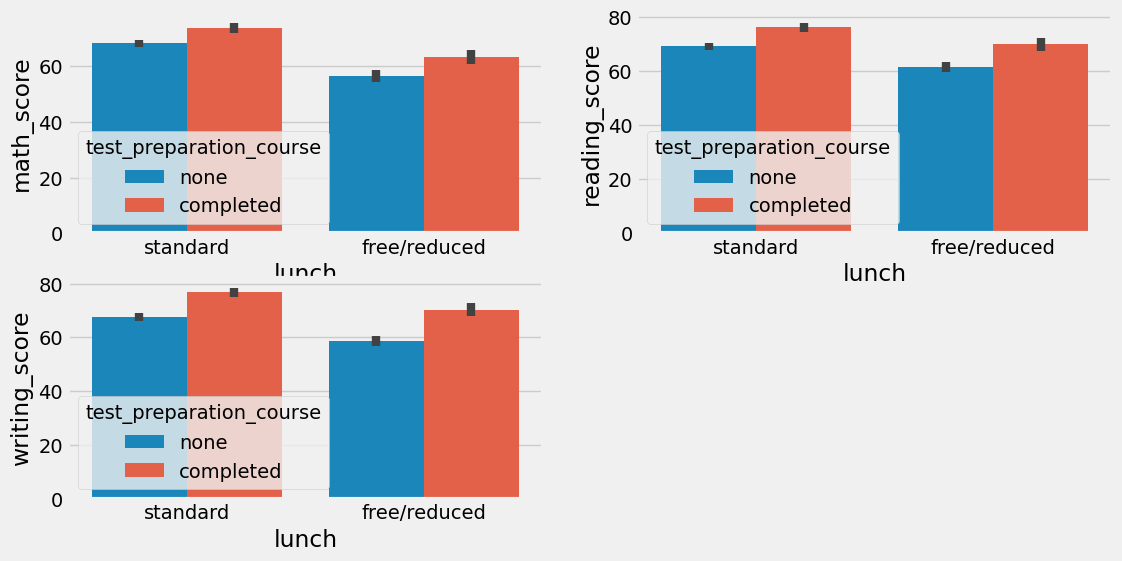

In [226]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### 4.4.7 Checking Outliers

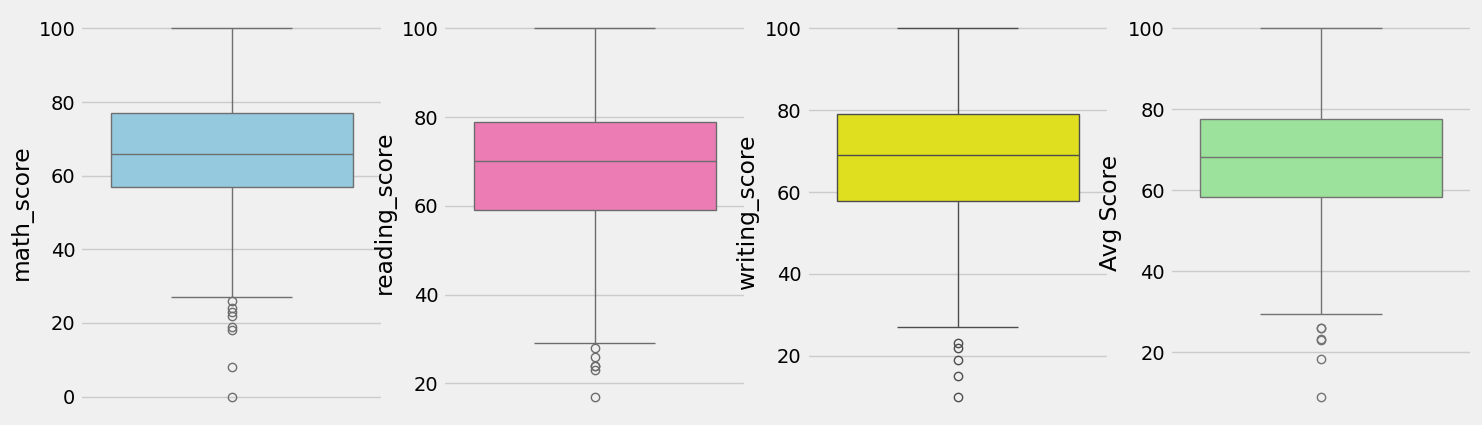

In [227]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Avg Score'],color='lightgreen')
plt.show()

#### 4.4.8 MULTIVARIATE ANALYSIS USING PAIRPLOT

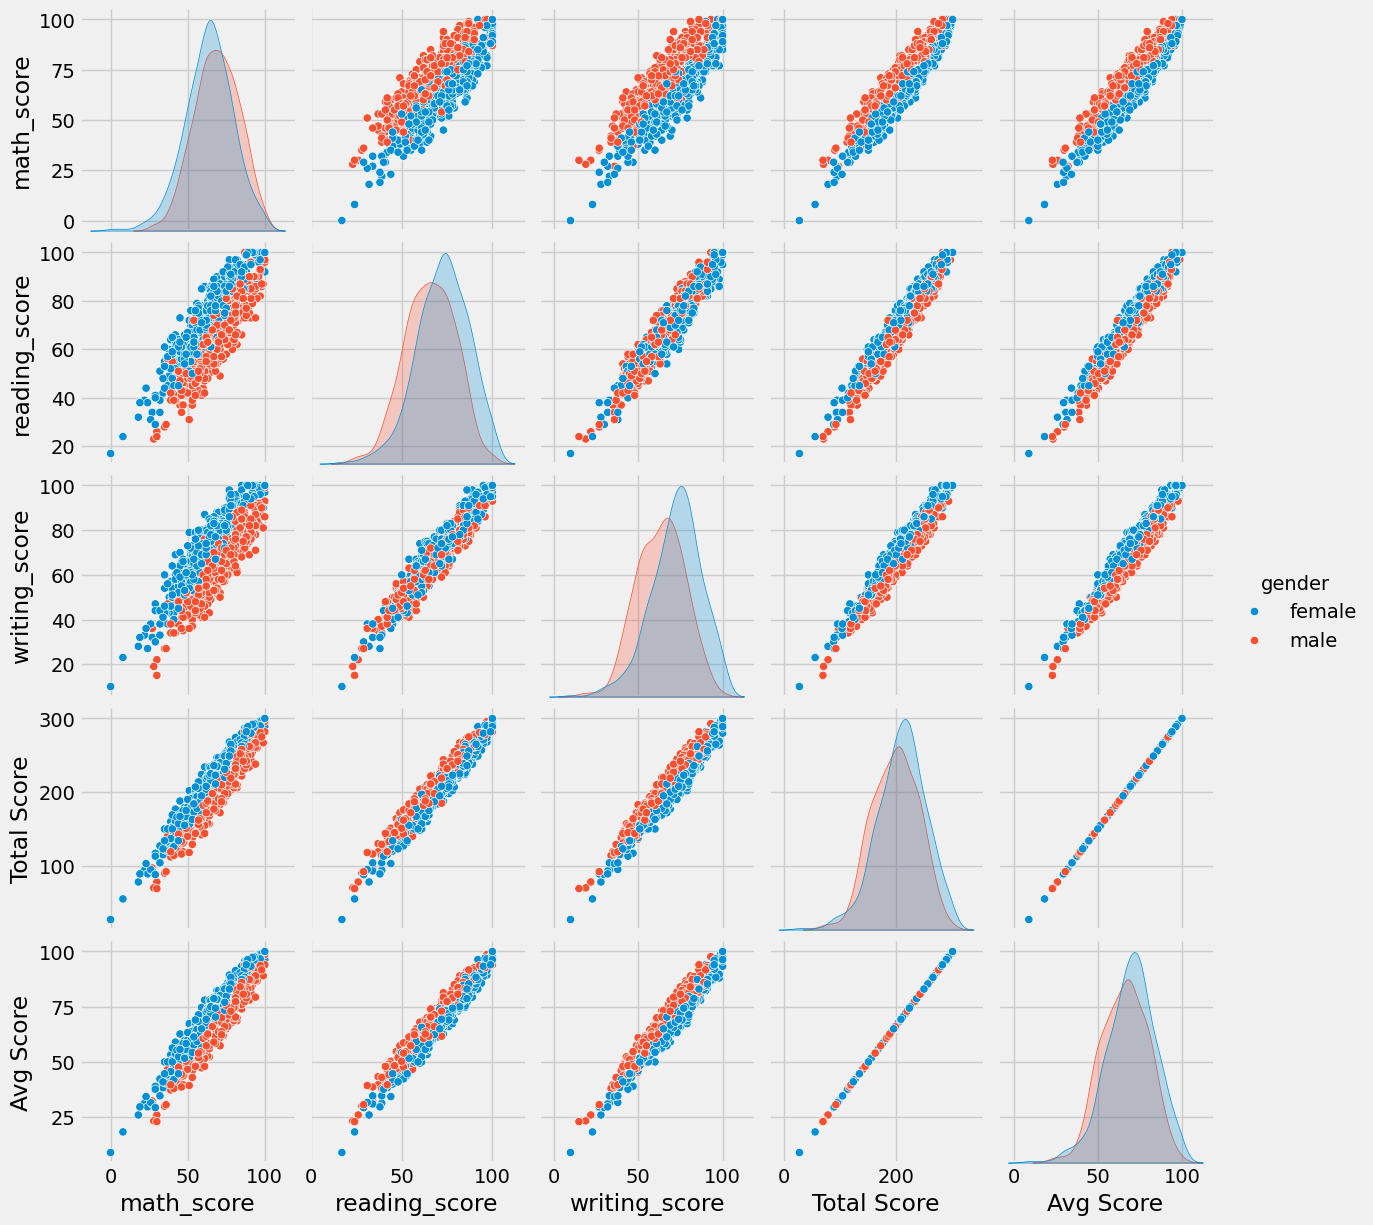

In [228]:
sns.pairplot(df,hue = 'gender')
plt.show()

- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Finishing preparation course is benefitial.